In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:

file_path = 'fake_job_postings.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [5]:
df = df[['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'fraudulent']]

# Fill missing values with empty string
df.fillna('', inplace=True)

# Combine text columns into a single feature
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# Define features and target variable
X = df['text']
y = df['fraudulent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Convert text into numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9809843400447428
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.99      0.61      0.76       173

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
 [[3402    1]
 [  67  106]]


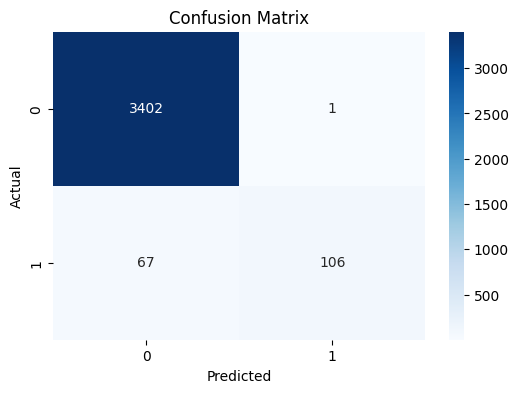

In [8]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

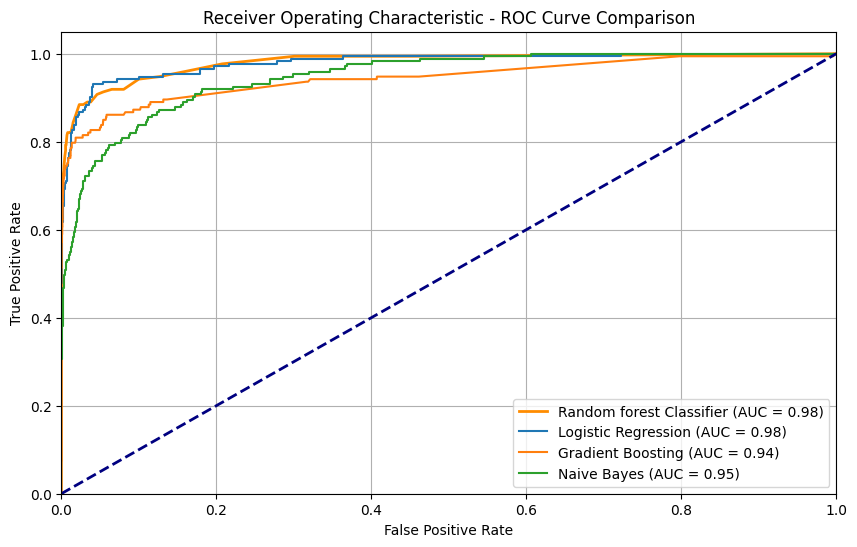

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming model, X_test_tfidf, y_test are already defined

# Base model (optional, if previously trained)
y_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
log_probs = log_model.predict_proba(X_test_tfidf)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
auc_log = auc(fpr_log, tpr_log)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_tfidf, y_train)
gb_probs = gb_model.predict_proba(X_test_tfidf)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
auc_gb = auc(fpr_gb, tpr_gb)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_probs = nb_model.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random forest Classifier (AUC = {roc_auc:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# Diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()
